In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Discrete random variables

The notion of an unpredictable process is too general and in the following we will restrict ourself to outcome sets that are subsets of $\mathbb{R}^M$. We will call such a process a _random variable_. 

If the outcome set is countable, in particular if it is finite, then we call such random variable _discrete_. As shown above  to characterise such a variable it is enough to assign  the probability to each of the elements of the outcome set. This is called _probability mass function_ (pmf). 

We will denote the probability of random variable $X$  taking a value $x$ by

$$P(X=x)\equiv P_X(\{x\})$$ 

However we will often abreviate it further to

$$ P_X(x) \equiv P_X(\{x\})$$

I will omit the subscript $X$ when it's clear from the context  which random variable I have in mind. 

### Join probability distribution

When we have two random variables $X$ and $Y$ with outcome sets $S_X$  and $S_Y$ we can treat them  together as one random variable with outcome set  $S_{X\times  Y}=S_{X}\times S_Y$ and joint probability mass function

$$P_{X\times Y}(x,y) \equiv P_{X\times Y}(X=x, Y=y)$$

If we are interested in only one of the variables we can calculate its probability mass function as _marginal_ pmf

$$P_X(x)= \sum_y P_{X\times Y}(x, y)\qquad P_Y(Y=y)= \sum_x P_{X\times Y}(x,y)$$

### Idependent random variables

The concept of independence applies also to random variables. We say that two random variables $X$ and $Y$ are independent iff (if and only if)

$$P(X=x|  Y=y)= P(X=x)\quad\text{for all }x,y$$

or equivalently

$$P_{X\times Y}(x, y)= P_X(x)\cdot P_Y(y) \quad\text{for all }x,y$$

For example when $X$ and $Y$ represents a first and second toss of a coin they are independent random variables. 

### Expectation value

Expectation value of a function with respect to a random variable $X$ is defined as

$$E_X[f(X)] \equiv \sum_i f(x_i)P(X=x_i),\quad x_i\in S_X$$ 

In particular the expectation value of the random variable _i.e._ its _mean_ or _average_ is 

$$E_X[X] \equiv \sum_i x_i P(X=x_i)$$ 

and the variance

$$\operatorname{var}(X)=\sigma^2 = E[(X-E[X])^2]$$

The square root of variance $\sigma$  is called _standard deviation_. 

#### Problem: linearity of expectation value

Show that

$$E_{X\times Y}[a X + b  Y]= a E_X[X] + b E_Y[Y]\quad\text{where }a,b\text{ are constants}$$

$$E_{X\times Y}[a X + b  Y]=\sum_{x,y}\left(a x + b y\right) P(X=x, Y=y) = a \sum_{x,y} x  P(X=x, Y=y)+b \sum_{x,y}  y P(X=x, Y=y) $$

$$a \sum_{x,y} x  P(X=x, Y=y) = a\sum_x  x \sum_y P(X=x, Y=y)= a\sum_x x P(X=x) = a E[X]$$

and same for other term.

__Problem:__ Variance

Show that 

$$\operatorname{var}(X) = E[X^2]-E[X]^2$$

__Answer__

$$\operatorname{var}(X) = E[(X-E[X])^2] = E\left[X^2-2 E[X]+E[X]^2\right]$$

$E[X]$ is a constant so using the linearity of expectation value we obtain

$$E\left[X^2-2 E[X]+E[X]^2\right]=E[X62]+2E[X]E[X]-E[X]^2$$

### Covariance and correlation

The expectation value of a product of two random variables is given by 

$$E_{X\times Y}[X\cdot Y]=\sum_{x,y} x\cdot y\, P(X=x , Y=y)$$

If the two random variables are independent then

$$E_{X\times Y}[X\cdot Y]=\sum_{x,y} x y P(X=x , Y=y)
=\sum_{x,y} x y P(X=x)P(Y=y)=
\left(\sum_{x} x P(X=x)\right)
\left(\sum_{y} y P(Y=y)\right)
$$

leading to the familiar result that the expectation value of independent random variables factorises

$$E_{X\times Y}[X\cdot Y]=E_X[X] E_Y[Y]$$

The quantity 

$$\operatorname{cov}(X,Y)=E_{X\times Y}[X\cdot Y]-E_X[X] E_Y[Y]=E[(X-E[X])(Y-E[Y])]$$

is called a _covariance_ and when variables $X$ and $Y$ are independent then it is equal to zero. Please take note however that zero covariance does not imply indpendence.

Magnitude of the covariance depeds on the magnitude of random variables e.g. scaling one variable by $a$ will also scale the covariance by $a$. That is why often a normalised version called _correlation_ coeficient is used:

$$\operatorname{corr}(X,Y)=\frac{E\left[(X-E[X])(Y-E[Y])\right]}{\sqrt{E\left[(X-E[X])^2\right]E\left[(Y-E[Y])^2\right]}}$$

__Problem__: Linear dependence

Please check that when variables $X$ and $Y$ are linearly dependent _i.e._  $Y =a \cdot X + b$ correlation between them is 1 or -1. 

Let's illustrate this with some Python code

In [2]:
xs = np.random.uniform(size=10000)
ys = np.random.uniform(size=10000)

In [3]:
#covariance 
np.mean( (xs-xs.mean())*(ys-ys.mean() ))

-0.0007763397832491917

We get same result using build in function

In [4]:
np.cov(xs,ys)

array([[ 0.08297983, -0.00077642],
       [-0.00077642,  0.08321473]])

In [5]:
#correlation
np.mean( (xs-xs.mean())*(ys-ys.mean() ))/np.sqrt(np.mean( (xs-xs.mean())**2)*np.mean((ys-ys.mean() )**2))

-0.009343484727426656

In [6]:
np.corrcoef(xs,ys)

array([[ 1.        , -0.00934348],
       [-0.00934348,  1.        ]])

In [7]:
zs = xs + ys 
np.corrcoef((xs,ys,zs))

array([[ 1.        , -0.00934348,  0.70328868],
       [-0.00934348,  1.        ,  0.70430218],
       [ 0.70328868,  0.70430218,  1.        ]])

__Problem:__ Variance of sum  of independent random variables

Show that if random variables $X$ and $Y$ are independent then

$$\operatorname{var}(X+Y) = \operatorname{var}(X) +  \operatorname{var}(Y)$$

Some other characteristics of the random variables include

### Median

Median $m$ is a number that divides the values of the random variable into two  sets as equiprobable as possible

$$P(X\le m) \ge \frac{1}{2}\text{ and } P(X\ge m) \ge \frac{1}{2}$$

#### Problem: Median for coin toss

What is a median for coin toss if you assign value $1$ to heads and $0$ to tails? 

### Mode 

The mode is the value for which the probability mass function has its maximum. That's an element most likely to be sampled.

$$\operatorname{mode}(X)=\underset{x_k}{\operatorname{argmax}} P(X=x_k)$$

### Entropy

Last characteristic of an distribution that I would like to introduce is the _entropy_ 

$$H[X] \equiv -\sum_i P_X(x_i) \log P_X(x_i)=-E[\log X] $$

Entropy is a "measure of randomnes", the greater entropy, the greater randomness or harder to predict outcome. 

Take for example a coin toss with unfair coin with probability $p$ of comming up heads. The entropy is 

$$-p\log p - (1-p)\log(1-p)$$

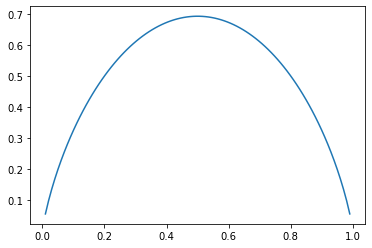

In [8]:
ps = np.linspace(0,1,100)[1:-1] # we reject 0 and 1
plt.plot(ps, -ps *np.log(ps)-(1-ps)*np.log(1-ps));

We can see that the entropy is maximum when $p=1/2$ and zero when $p=0$ or $p=1$ that is when the outcome is certain. 